In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Convert to csv
# Commented out as its already been run
'''
from JSONtoCSV import convert_json_to_csv 
mouse_events_dataframe = convert_json_to_csv('mouse_events.json')
mouse_events_dataframe.head()
'''

"\nfrom JSONtoCSV import convert_json_to_csv \nmouse_events_dataframe = convert_json_to_csv('mouse_events.json')\nmouse_events_dataframe.head()\n"

In [3]:
# Load from csv
df = pd.read_csv('mouse_events.csv')
df = df.rename(columns={'Unnamed: 0' : 'index'})    # Think i can just use pandas built in index?
# TODO 'Normalise' time to be from 0 to end_time in seconds.

print(df.head())
print('Largest x, y: ', df['x'].max(), df['y'].max())
print(len(df['turkId'].unique()), ' Unique turk Ids')

index  button      event_type          target          time      x      y  \
0      0       1       mousedown  alloc-slider-1  1.417182e+12  477.0  405.0   
1      1       1         mouseup  alloc-slider-1  1.417182e+12  478.0  405.0   
2      2       1           click  alloc-slider-1  1.417182e+12  478.0  405.0   
3      3       1       mousedown  alloc-slider-1  1.417182e+12  479.0  405.0   
4      4       1  mousedirchange  alloc-slider-1  1.417182e+12  543.0  403.0   

   step          turkId  
0     1  A35YFAFWP33C70  
1     1  A35YFAFWP33C70  
2     1  A35YFAFWP33C70  
3     1  A35YFAFWP33C70  
4     1  A35YFAFWP33C70  
Largest x, y:  1879.0 2344.0
461  Unique turk Ids


In [4]:
# Full dataset has over 1 million records, wayyy to much to work with for initial exploration
df_small = df.head(5000) # 'only' first 5,000 records
df_small = df_small[['time', 'x', 'y', 'turkId']]   #Only care about these columns for now
df_small.head()


,time,x,y,turkId
0,1.417182e+12,477.0,405.0,A35YFAFWP33C70
1,1.417182e+12,478.0,405.0,A35YFAFWP33C70
2,1.417182e+12,478.0,405.0,A35YFAFWP33C70
3,1.417182e+12,479.0,405.0,A35YFAFWP33C70
4,1.417182e+12,543.0,403.0,A35YFAFWP33C70


In [5]:
unique_turks = df_small['turkId'].unique()
type(unique_turks)
unique_turks

array(['A35YFAFWP33C70', 'A33XI8ZN4NZ0SQ', 'A1ZG7VYH0DUEXW',
       'A1RXG8RE0SJ4LC', 'AUDH0P4ZHJKS2', 'A3BGIK3STL9345',
       'A2SDYTC2KXID0I'], dtype=object)

In [6]:
# 'Normalise' time in dataframe
'''
for turk in unique_turks:
        zzz = df_small[ df_small['turkId'] == turk] 

        timezzzdiff = unique_turk_df['time'].iloc[unique_turks.size] - unique_turk_df['time'].iloc[0] 
'''

print(df_small[ df_small['turkId']=='A33XI8ZN4NZ0SQ' ] )
initial_time = df_small['time'][ df_small['turkId']=='A33XI8ZN4NZ0SQ' ].iloc[0]
print(initial_time)
#df.apply(np.sqrt)
test = df_small['time'][ df_small['turkId']=='A33XI8ZN4NZ0SQ' ].add(-initial_time).div(1000)
print(test )

time      x       y          turkId
648   1.417182e+12  445.0   426.0  A33XI8ZN4NZ0SQ
649   1.417182e+12  511.0   434.0  A33XI8ZN4NZ0SQ
650   1.417182e+12  413.0   425.0  A33XI8ZN4NZ0SQ
651   1.417182e+12  441.0   430.0  A33XI8ZN4NZ0SQ
652   1.417182e+12  444.0   432.0  A33XI8ZN4NZ0SQ
...            ...    ...     ...             ...
1391  1.417182e+12  638.0  1197.0  A33XI8ZN4NZ0SQ
1392  1.417182e+12  638.0  1197.0  A33XI8ZN4NZ0SQ
1393  1.417182e+12  638.0  1197.0  A33XI8ZN4NZ0SQ
1394  1.417182e+12  638.0  1197.0  A33XI8ZN4NZ0SQ
1395  1.417182e+12  638.0  1197.0  A33XI8ZN4NZ0SQ

[748 rows x 4 columns]
1417182414307.0
648      0.000
649      0.446
650      1.271
651      3.070
652      3.123
         ...  
1391    83.542
1392    83.542
1393    83.542
1394    83.542
1395    83.542
Name: time, Length: 748, dtype: float64


In [7]:
def initilise_time(dataframe):
    '''
    Input  = Pandas Dataframe
    Output = Pandas Dataframe
    Move to JSONtoCSV when completed.
    TODO try and get working without pandas as itll be much faster lol
    '''
    # Step 1 get list of unique turkIds
    unique_Ids = dataframe['turkId'].unique()
    for Id in unique_Ids:
        initial_time = df_small['time'][ df_small['turkId']==Id ].iloc[0]
        print(initial_time)
        df_small['time'] = df_small['time'][ df_small['turkId']==Id ].add(-initial_time).div(1000)

df_small_copy = df_small
initilise_time(df_small_copy)

1417182276985.0
nan
nan
nan
nan
nan
nan


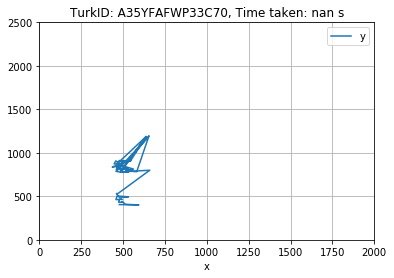

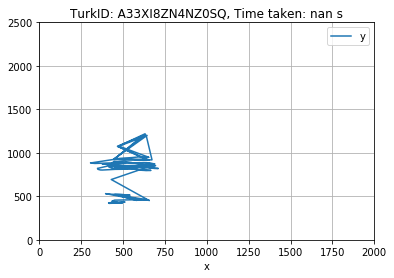

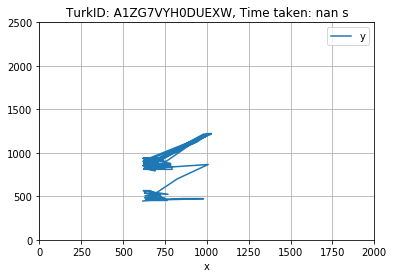

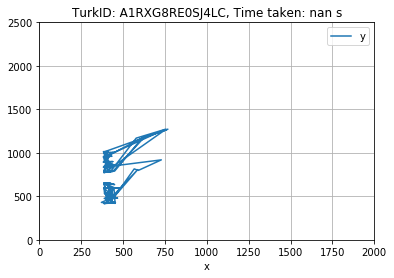

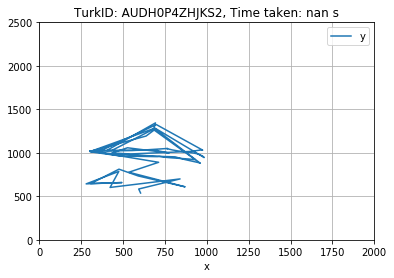

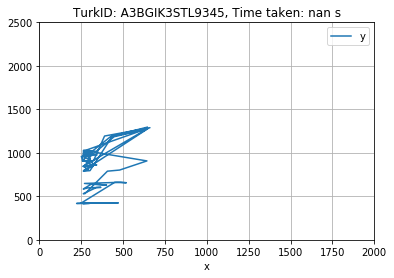

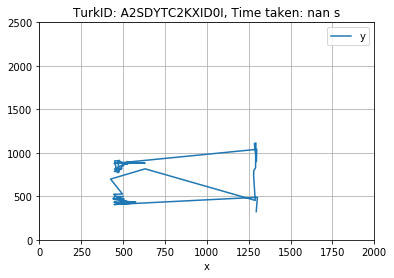

In [8]:
def plot_unique_turks(unique_turks):
    ##Plot values https://datatofish.com/plot-dataframe-pandas/
    for turk in unique_turks:
        unique_turk_df = df_small[ df_small['turkId'] == turk] 

        timediff = unique_turk_df['time'].iloc[unique_turks.size] - unique_turk_df['time'].iloc[0] 

        title_format = 'TurkID: {}, Time taken: {} s'.format(turk, timediff/1000)
        unique_turk_df.plot(kind='line', x ='x', y='y', grid=True, xlim=[0,2000], ylim=[0,2500], title=title_format) # limits match file max


plot_unique_turks(unique_turks)

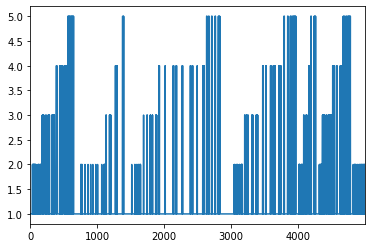

In [9]:
df.head(5000)['step'].plot()

In [10]:
#